## Creating Census Tract Map - Median Income

The lab_black extension is already loaded. To reload it, use:
  %reload_ext lab_black


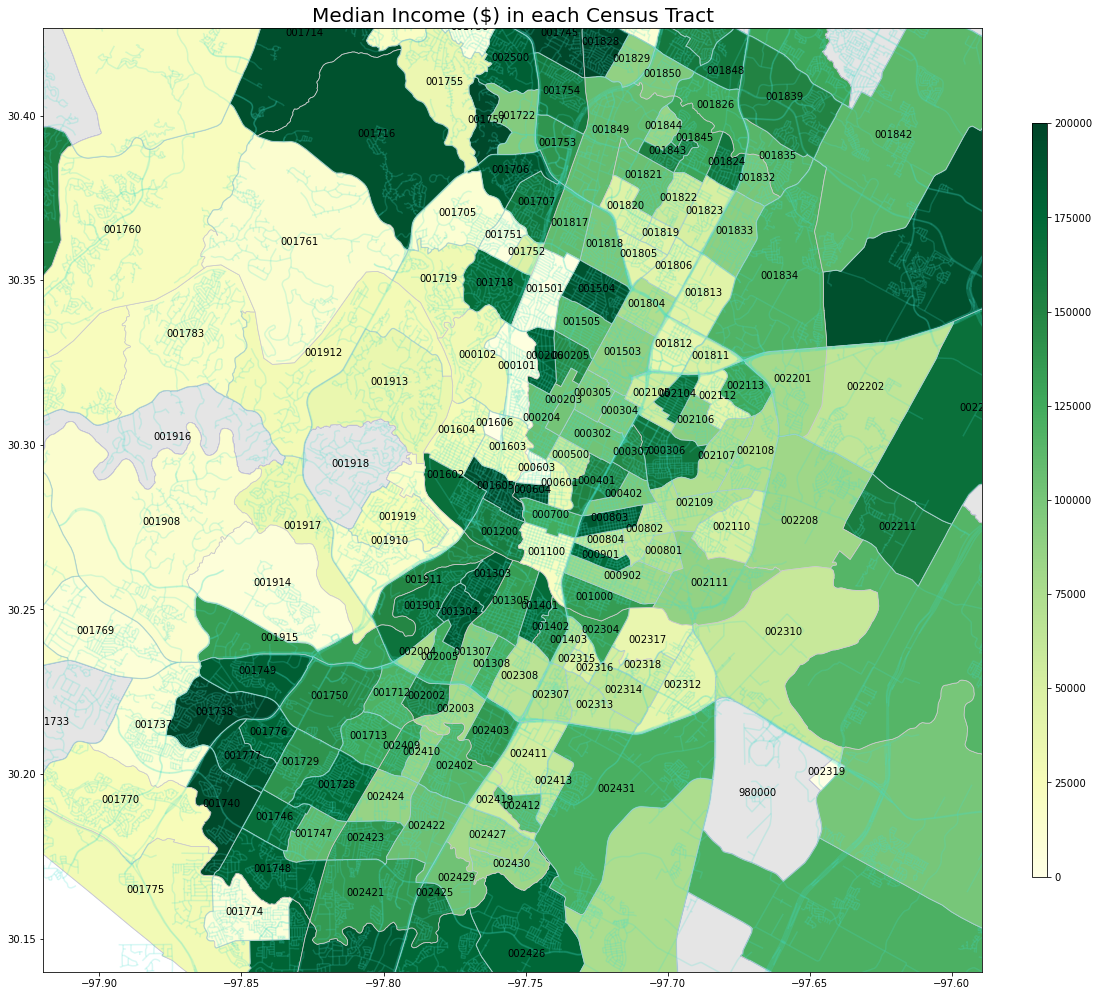

In [42]:
%load_ext lab_black

#### Dependencies and packages
import os
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import math as math
import datetime as dt
import pandas as pd
import geopandas as gpd
import plotly.figure_factory as ff
from matplotlib.collections import PatchCollection


# Plot the census tracts from the US Census Bureau's shapefile using geopandas.
from shapely.geometry import Point, LineString

map_df = gpd.read_file("shapefile/tl_2010_48453_tract10.shp")
map_df = map_df.rename(columns={"GEOID10": "Census Tract"})
map_df

file_to_load = "../Data/mrgdata_food.csv"

dfmrgdata = pd.read_csv(file_to_load)
dfmrgdata

# Read Austin Streetlines shapefile:
streets = gpd.read_file("shapefile/geo_export_046d754e-b27d-49f7-bdad-79756339ee26.shp")
streets = streets.to_crs(map_df.crs)

# Match the datatypes
map_df["Census Tract"] = map_df["Census Tract"].astype("int64")
df_all_data = pd.merge(map_df, dfmrgdata, on="Census Tract", how="inner",)

# Export to CSV
df_all_data.to_csv("../mapping_resources/merge_shp_acs_cdc.csv")

# Create a plot using geopandas and choropleth of census tract
_, ax = plt.subplots(figsize=(18, 18))

# Match the datatypes

map_df[["INTPTLAT10", "INTPTLON10"]] = map_df[["INTPTLAT10", "INTPTLON10"]].astype(
    "float64"
)

# Render the glyphs
vmax_data = 200000
vmin_data = 0
map_df.plot(ax=ax, color="grey", edgecolor="blue", alpha=0.2)
df_all_data.plot(
    ax=ax,
    column="Median Income (dollars)",
    cmap="YlGn",
    linewidth=0.8,
    edgecolor="0.8",
)

# Render Streets
streets.plot(ax=ax, color="turquoise", alpha=0.2)

# Label census tracts
for idx, row in map_df.iterrows():
    plt.annotate(
        text=row["TRACTCE10"],
        xy=(row["INTPTLON10"], row["INTPTLAT10"]),
        horizontalalignment="center",
        clip_on=True,
    )

# Set the limits of the plot
# To get a zommed out view use: (-97.919881, -97.589348, 30.139918,30.426626)
# For zoomed map use : (-97.81, -97.68, 30.22, 30.325)
bbox = (-97.919881, -97.589348, 30.139918, 30.426626)
plt.xlim(bbox[0], bbox[1])
plt.ylim(bbox[2], bbox[3])

plt.axis("on")
plt.title("Median Income ($) in each Census Tract", fontsize=20)
census_tract = plt.cm.ScalarMappable(
    cmap="YlGn", norm=plt.Normalize(vmin=vmin_data, vmax=vmax_data)
)

plt.colorbar(census_tract, fraction=0.015, aspect=50)
plt.savefig("images/Median Income Census Tract.png")
plt.show()

## Creating Census Tract Map - Number of Fast Food Restaurants

The lab_black extension is already loaded. To reload it, use:
  %reload_ext lab_black


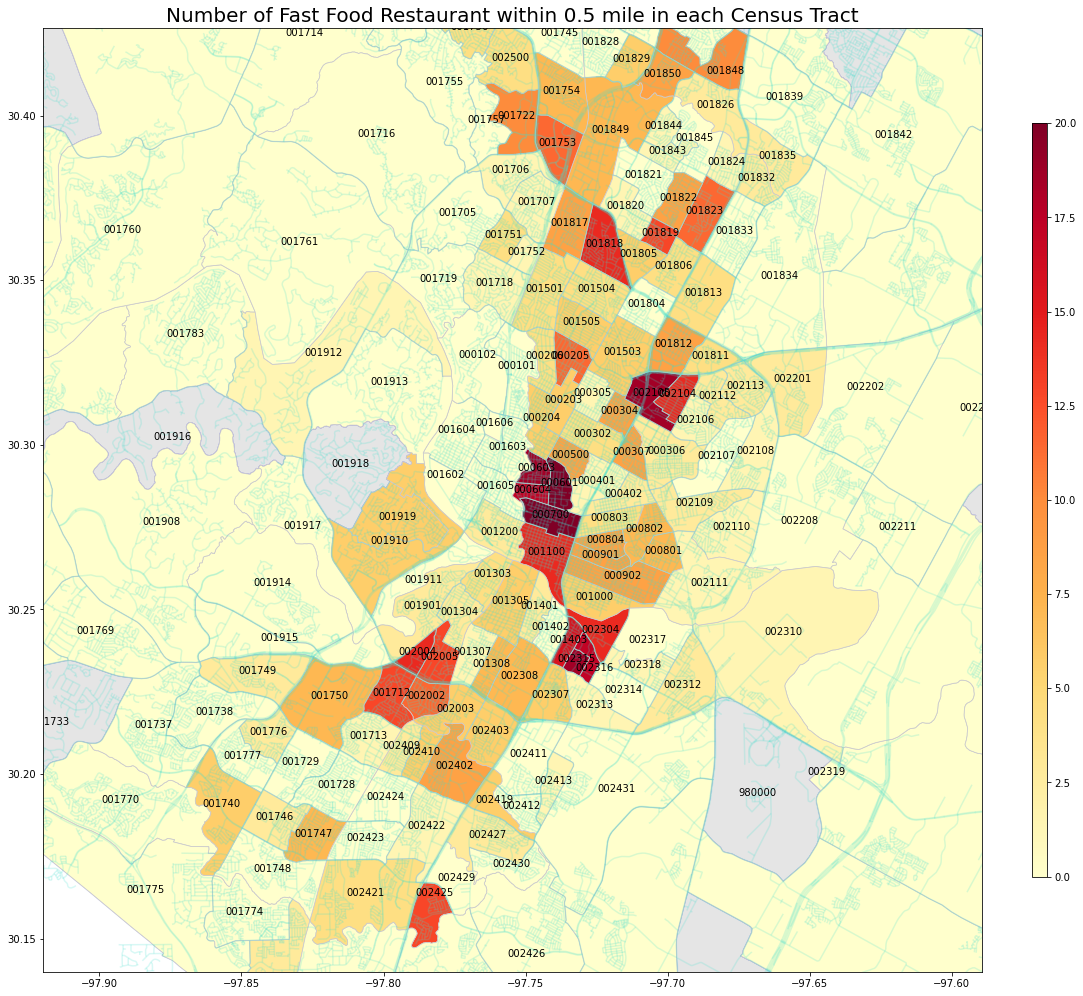

In [43]:
%load_ext lab_black

#### Dependencies and packages
import os
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import math as math
import datetime as dt
import pandas as pd
import geopandas as gpd
import plotly.figure_factory as ff
from matplotlib.collections import PatchCollection


# Plot the census tracts from the US Census Bureau's shapefile using geopandas.
from shapely.geometry import Point, LineString

map_df = gpd.read_file("shapefile/tl_2010_48453_tract10.shp")
map_df = map_df.rename(columns={"GEOID10": "Census Tract"})
map_df

file_to_load = "../Data/mrgdata_food.csv"

dfmrgdata = pd.read_csv(file_to_load)
dfmrgdata

# Read Austin Streetlines shapefile:
streets = gpd.read_file("shapefile/geo_export_046d754e-b27d-49f7-bdad-79756339ee26.shp")
streets = streets.to_crs(map_df.crs)

# Match the datatypes
map_df["Census Tract"] = map_df["Census Tract"].astype("int64")
df_all_data = pd.merge(map_df, dfmrgdata, on="Census Tract", how="inner",)

# Export to CSV
df_all_data.to_csv("../mapping_resources/merge_shp_acs_cdc.csv")

# Create a plot using geopandas and choropleth of census tract
_, ax = plt.subplots(figsize=(18, 18))

# Match the datatypes

map_df[["INTPTLAT10", "INTPTLON10"]] = map_df[["INTPTLAT10", "INTPTLON10"]].astype(
    "float64"
)

# Render the glyphs
vmax_data = 20
vmin_data = 0
map_df.plot(ax=ax, color="grey", edgecolor="blue", alpha=0.2)
df_all_data.plot(
    ax=ax, column="Number of Fast Food", cmap="YlOrRd", linewidth=0.8, edgecolor="0.8",
)

# Render Streets
streets.plot(ax=ax, color="turquoise", alpha=0.2)

# Label census tracts
for idx, row in map_df.iterrows():
    plt.annotate(
        text=row["TRACTCE10"],
        xy=(row["INTPTLON10"], row["INTPTLAT10"]),
        horizontalalignment="center",
        clip_on=True,
    )

# Set the limits of the plot
# To get a zommed out view use: (-97.919881, -97.589348, 30.139918,30.426626)
# For zoomed map use : (-97.81, -97.68, 30.22, 30.325)
bbox = (-97.919881, -97.589348, 30.139918, 30.426626)
plt.xlim(bbox[0], bbox[1])
plt.ylim(bbox[2], bbox[3])

plt.axis("on")
plt.title(
    "Number of Fast Food Restaurant within 0.5 mile in each Census Tract", fontsize=20
)
census_tract = plt.cm.ScalarMappable(
    cmap="YlOrRd", norm=plt.Normalize(vmin=vmin_data, vmax=vmax_data)
)

plt.colorbar(census_tract, fraction=0.015, aspect=50)
plt.savefig("images/Number of Fast Food in Census Tract.png")
plt.show()

## Creating Census Tract Scatter Map

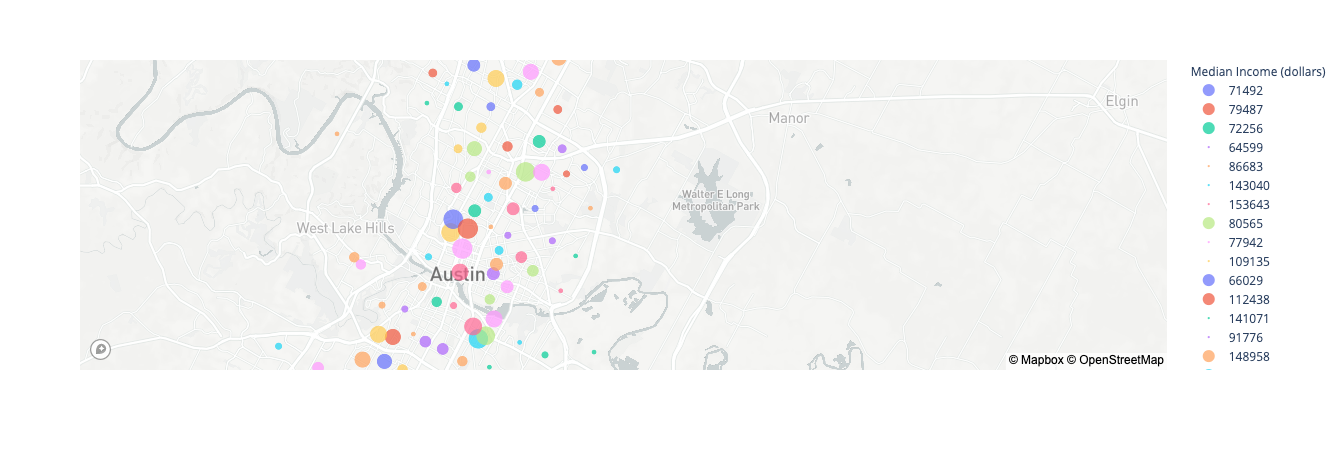

In [41]:
from api_keys import map_box_token
import plotly.express as px

px.set_mapbox_access_token(map_box_token)

fig = px.scatter_mapbox(
    df_all_data,
    lat="Lat_bp",
    lon="Lng_bp",
    color="Median Income (dollars)",
    size="Number of Fast Food",
    color_continuous_scale=px.colors.cyclical.IceFire,
    size_max=15,
    zoom=10,
)
fig.show()

## Creating Census Tract Density Map (Point)

In [ ]:
import pandas as pd

import plotly.express as px

fig = px.density_mapbox(
    df_all_data,
    lat="Lat_bp",
    lon="Lng_bp",
    z="Data_Value_chol",
    radius=10,
    center=dict(lat=30.22, lon=-97.71),
    zoom=10,
    mapbox_style="stamen-terrain",
)
fig.show()

## Importing GEOJSON (TBD - Still Testing)

In [ ]:
import plotly.graph_objects as go
import pandas as pd
import json

with open("shapefile/Boundaries_ Austin MSA Census Tracts 2010.geojson") as json_file:
    ct_boundary = json.load(json_file)

fig = go.Figure(data=[go.Scattermapbox(lat=[0], lon=[0])])

fig.update_layout(
    margin={"r": 0, "t": 0, "l": 0, "b": 0},
    mapbox=go.layout.Mapbox(
        style="stamen-terrain",
        zoom=12,
        center_lat=30.2672,
        center_lon=-97.7431,
        layers=[{"sourcetype": "geojson", "source": ct_boundary, "type": "line",}],
    ),
)
fig.show()